In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import re
import plotly.express as px
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [3]:
data= sqlite3.connect(r'C:\Users\nehan\Data Analysis Projects\5. Amazon Customers Data Analysis\Amazon Customers Data\database.sqlite')

In [4]:
type(data)

sqlite3.Connection

In [5]:
data_dataframe = pd.read_sql_query('SELECT * from Reviews lIMIT 3', data)
data_dataframe.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...

In [6]:
data_dataframe.shape

(3, 10)

In [17]:
data_csv= pd.read_csv(r'C:\Users\nehan\Data Analysis Projects\5. Amazon Customers Data Analysis\Amazon Customers Data\Reviews.csv')
data_csv.shape

(568454, 10)

In [8]:
data_csv.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

## Perform Sentiment Analysis on give data
Sentiment analysis is the computational task of automatically determining what feelings a writer is expressing in text
Some examples of applications for sentiment analysis include:

1.Analyzing the social media discussion around a certain topic
2.Evaluating survey responses
3.Determining whether product reviews are positive or negative

Sentiment analysis is not perfect.It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze it.For this project,the goal is to to classify Food reviews based on customers' text.

In [14]:
text = data_csv["Summary"][0]
text

'Good Quality Dog Food'

In [15]:
TextBlob(text).sentiment.polarity

0.7

In [23]:
polarity = [] # list which will contain the polarity of the comments

for i in data_csv['Summary']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)

In [24]:
len(polarity)

568454

In [26]:
data_work= data_csv.copy()

In [29]:
data_work["Polarity"]= polarity
data_work.shape

(568454, 11)

## Perform EDA for the Positive Sentences

In [31]:
data_positive = data_work[data_work["Polarity"]>0]
data_positive.shape

(331665, 11)

In [33]:
stopwords= set(STOPWORDS)

In [56]:
total_text_positive = (' '.join(data_positive['Summary']))
len(total_text_positive)

8465012

In [57]:
total_text_positive[0:20000]

'Good Quality Dog Food Great taffy Nice Taffy Great!  Just as good as the expensive brands! Wonderful, tasty taffy Healthy Dog Food The Best Hot Sauce in the World My cats LOVE this "diet" food better than their regular food My Cats Are Not Fans of the New Food fresh and greasy! Love it! GREAT SWEET CANDY! Always fresh Delicious product! Great Bargain for the Price The Best Hot Sauce in the World Great machine! Best of the Instant Oatmeals Good Instant Great Irish oatmeal for those in a hurry! satisfying Love Gluten Free Oatmeal!!! GOOD WAY TO START THE DAY.... Wife\'s favorite Breakfast Why wouldn\'t you buy oatmeal from Mcanns? Tastes great! Good Hot Breakfast Great taste and convenience good Very good but next time I won\'t order the Variety Pack HOT!  And good!  Came back for more  :) Roasts up a smooth brew Our guests love it! Awesome Deal! Awsome - Kids in neighborhood loved us! great deal. Better price for this at Target great source of electrolytes Great for preventing cramps T

In [58]:
total_text_positive=re.sub('[^a-zA-Z]',' ',total_text)
total_text_positive=re.sub(' +',' ',total_text) ## remove extra spaces

In [59]:
total_text_positive[0:20000]

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

(-0.5, 999.5, 499.5, -0.5)

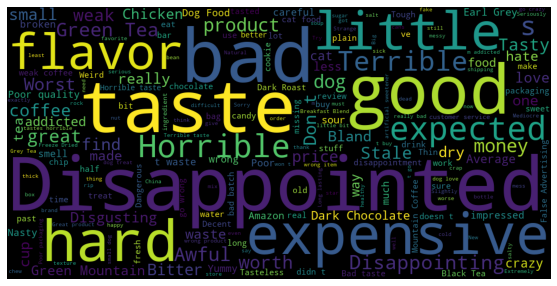

In [60]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_text_positive)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Perform EDA for Negative Sentiments

In [61]:
data_negative= data_work[data_work["Polarity"]<0]
len(data_negative)

52516

In [62]:
data_negative.shape

(52516, 11)

In [63]:
total_text_negative= (' '.join(data_negative['Summary']))
len(total_text_negative)

1438541

In [64]:
total_text_negative=re.sub('[^a-zA-Z]',' ',total_text)
total_text_negative=re.sub(' +',' ',total_text) ## remove extra spaces
total_text_negative[0:20000]

'poor taste Nasty No flavor How can you go wrong pretty expensive stale product Bigger then other brands Order only in cold weather Bad disappointing My every day green tea BROKEN BOTTLE BOTTOMS Tasteless but low calorie Marley s Mellow Mood Lite Half Tea Half Lemonade Nearly killed the cats CHANGED FORMULA MAKES CATS SICK Not a real tea Mcclures bloody Mary mix Not Good Eukanuba puppy small breed dog food My everyday cup of Tea Disappointed Sad outcome Don t Waste Your Money Disappointed sugar in the raw Good product but terrible agricultural practices Sugar in the raw Sugar in the raw too expensive Not sure So awful I can barely describe AWFUL Bitter A saving grace for Green Mountain Coffee Fantastic Chicken Noodle soup Heinz no more Disappointing Waste of money Ham Base MSG Ham Base Love the product disappointed in the shipping poor item packaging Awful disappointing Hard a slight taste of jalapeno Heavy on the Vinegar These chips make me weak at the knees Not bad but a little hard 

(-0.5, 999.5, 499.5, -0.5)

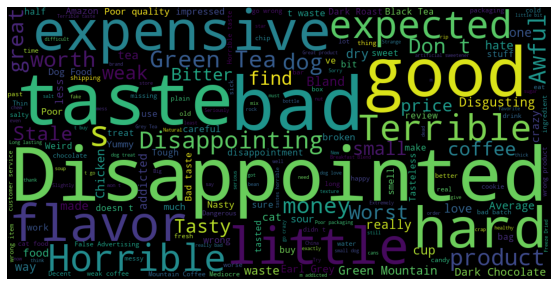

In [65]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_text_negative)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

## Analyse to what user Amzon can recommend more products?
 Amazon can recommend more products to only those who are going to buy more or to one who has a better conversion rate,so lets ready data according to this problem statement

In [67]:
data_csv.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [71]:
data_csv["UserId"].nunique()

256059

In [76]:
user =data_csv.groupby(['UserId']).agg({'Summary':'count', 'Text':'count','Score':'mean','ProductId':'count'}).sort_values(by= "Text", ascending= False)
user.columns=['Number_of_summaries','num_text','Avg_score','Number_of_products_purchased']
user.head(10)

Number_of_summaries  num_text  Avg_score  \
UserId                                                     
A3OXHLG6DIBRW8                  448       448   4.535714   
A1YUL9PCJR3JTY                  421       421   4.494062   
AY12DBB0U420B                   389       389   4.647815   
A281NPSIMI1C2R                  365       365   4.841096   
A1Z54EM24Y40LL                  256       256   4.453125   
A1TMAVN4CEM8U8                  204       204   4.833333   
A2MUGFV2TDQ47K                  201       201   3.751244   
A3TVZM3ZIXG8YW                  199       199   1.000000   
A3PJZ8TU8FDQ1K                  178       178   4.601124   
AQQLWCMRNDFGI                   176       176   3.954545   

                Number_of_products_purchased  
UserId                                        
A3OXHLG6DIBRW8                           448  
A1YUL9PCJR3JTY                           421  
AY12DBB0U420B                            389  
A281NPSIMI1C2R                           365  
A1Z54EM24Y40LL                           256  
A1TMAVN4CEM8U8                           204  
A2MUGFV2TDQ47K                           201  
A3TVZM3ZIXG8YW                           199  
A3PJZ8TU8FDQ1K                           178  
AQQLWCMRNDFGI                            176

In [78]:
user_top_10=user.index[0:10]
number_top_10=user['Number_of_products_purchased'][0:10]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

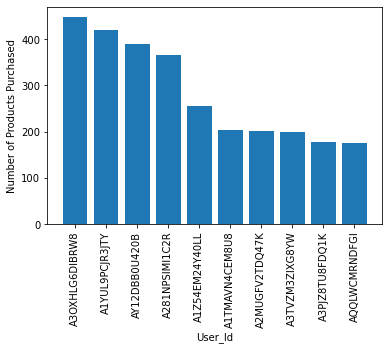

In [81]:
plt.bar(user_top_10, number_top_10, label='Most recommended User')
plt.xlabel('User_Id')
plt.ylabel('Number of Products Purchased')
plt.xticks(rotation='vertical')

## Conclusion:
### These are the Top 10 Users so we can recommend more & more Prodcuts to these Usser Id as there will be a ### high probability that these person are going to be buy more

## 

## Analyse the length of comments whether coustomer are going to give lengthy comments or short comments

In [82]:
data_csv.sample(n=2000)
final= data_csv[0:2000]

In [83]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [84]:
final.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [86]:
final.duplicated().sum()

0

In [91]:
def calc_len(text):
    return len(text.split(" "))

In [93]:
final['Text_Length']= final["Text"].apply(calc_len)

C:\Users\nehan\AppData\Local\Temp/ipykernel_7804/3856434355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Text_Length']= final["Text"].apply(calc_len)


In [96]:
px.box(final, y= "Text_Length")

## Conclusion-->>
#### Seems to have Almost 50 percent users are going to give their Feedback limited to 50 words whereas there are only few users #### who are going give Lengthy Feedbacks


## Analyse the Score

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Score', ylabel='count'>

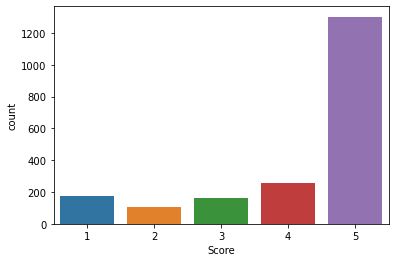

In [97]:
sns.countplot(final["Score"])

## Text Pre-Processsing

In [98]:
final['Text'] =final['Text'].str.lower()
final.head(10)

C:\Users\nehan\AppData\Local\Temp/ipykernel_7804/47317157.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8   9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9  10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   
5                     0                       0      4  1342051200   
6                     0                       0      5  1340150400   
7                     0                       0      5  1336003200   
8                     1                       1      5  1322006400   
9                     0                       0      5  1351209600   

                                         Summary  \
0                          Good Quality Dog Food   
1                              Not as Advertised   
2                          "Delight" says it all   
3                                 Cough Medicine   
4                                    Great taffy   
5                                     Nice Taffy   
6  Great!  Just as good as the expensive brands!   
7                         Wonderful, tasty taffy   
8                                     Yay Barley   
9                               Healthy Dog Food   

                                                Text  Text_Length  
0  i have bought several of the vitality canned d...           49  
1  product arrived labeled as jumbo salted peanut...           31  
2  this is a confection that has been around a fe...           99  
3  if you are looking for the secret ingredient i...           43  
4  great taffy at a great price.  there was a wid...           30  
5  i got a wild hair for taffy and ordered this f...           72  
6  this saltwater taffy had great flavors and was...           53  
7  this taffy is so good.  it is very soft and ch...           28  
8  right now i'm mostly just sprouting this so my...           26  
9  this is a very healthy dog food. good for thei...           25

In [99]:
final['Text'][164]

'seriously this product was as tasteless as they come. there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack. you just have to season it or combine it with something else to share the flavor.'

In [102]:
re.sub('[^a-zA-Z]',' ',final['Text'][164])
# drawback of this re.sub in this use-case is, it will remove some numerical data too & may be that numerical
# values matters alot thats way, I am going to create my own logic over here,that will remove all the special character

'seriously this product was as tasteless as they come  there are much better tasting products out there but at     calories its better than a special k bar or cookie snack pack  you just have to season it or combine it with something else to share the flavor '

In [103]:
# logic to remove punctuations or all the special characters

In [101]:
# define punctuation
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

data= final['Text'][164]

# remove punctuation from the string
no_punct = ""
for char in data:
    if char not in punctuations:
        no_punct = no_punct + char

# display the unpunctuated string
no_punct

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [105]:
def remove_punc(review):
    import string
    punctuations =string.punctuation
    # remove punctuation from the string
    no_punct = ""
    for char in review:
        if char not in punctuations:
            no_punct = no_punct + char
    return no_punct

In [106]:
final['Text'] =final['Text'].apply(remove_punc)

C:\Users\nehan\AppData\Local\Temp/ipykernel_7804/878182082.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  i have bought several of the vitality canned d...   
1      Not as Advertised  product arrived labeled as jumbo salted peanut...   
2  "Delight" says it all  this is a confection that has been around a fe...   
3         Cough Medicine  if you are looking for the secret ingredient i...   
4            Great taffy  great taffy at a great price  there was a wide...   

   Text_Length  
0           49  
1           31  
2           99  
3           43  
4           30

In [108]:
final['Text'][164]

'seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

#### Removal of Stopwords

In [109]:
review='seriously this product was as tasteless as they come there are much better tasting products out there but at 100 calories its better than a special k bar or cookie snack pack you just have to season it or combine it with something else to share the flavor'

In [125]:
re=[word for word in data.split(' ') if word not in set(stopwords.words('english'))]
str=''
for wd in re:
    str=str+wd
    str=str+' '
str

'seriously product tasteless come. much better tasting products 100 calories better special k bar cookie snack pack. season combine something else share flavor. '

#### perform this task using function as I have to apply this logic on my entire column

In [126]:
def remove_stopwords(review):
    return ' '.join([word for word in review.split(' ') if word not in set(stopwords.words('english'))])

In [127]:
remove_stopwords(review)

'seriously product tasteless come much better tasting products 100 calories better special k bar cookie snack pack season combine something else share flavor'

In [129]:
final.shape

(2000, 11)

In [130]:
final.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Text_Length'],
      dtype='object')

In [131]:
final['Text'] = final['Text'].apply(remove_stopwords)

C:\Users\nehan\AppData\Local\Temp/ipykernel_7804/2578023132.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [132]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  bought several vitality canned dog food produc...   
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...   
2  "Delight" says it all  confection around centuries  light pillowy cit...   
3         Cough Medicine  looking secret ingredient robitussin believe f...   
4            Great taffy  great taffy great price  wide assortment yummy...   

   Text_Length  
0           49  
1           31  
2           99  
3           43  
4           30

### Pre-process your Data in a Depth

#### check if urls is present in Text column or not

In [133]:
final['Text'].str.contains('http?').sum()

35

In [134]:
final['Text'].str.contains('http').sum()

35

In [135]:
pd.set_option('display.max_rows',2000)
final['Text'].str.contains('http',regex=True)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39       True
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [136]:
final['Text'][21]

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

#### we will observe we have some kind of URLs over here in my data that is definitely a kind of Dirtines in data, so we have to clean this data & make ready data for the analysis purpose

####  Removal of urls

In [138]:
review =final['Text'][21]
review

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price hrefhttpwwwamazoncomgpproductb001gvisjmtwizzlers strawberry 16ounce bags pack 6a'

In [140]:
import re
url_pattern = re.compile(r'href|http.\w+')
url_pattern.sub(r'', review)

'bought husband currently overseas loves apparently staff likes alsobr generous amounts twizzlers 16ounce bag well worth price  strawberry 16ounce bags pack 6a'

In [141]:
import re
def remove_urls(review):
    url_pattern = re.compile(r'href|http.\w+')
    return url_pattern.sub(r'', review)

In [142]:
final['Text'] = final['Text'].apply(remove_urls)


C:\Users\nehan\AppData\Local\Temp/ipykernel_7804/4256046039.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [143]:
final.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  bought several vitality canned dog food produc...   
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...   
2  "Delight" says it all  confection around centuries  light pillowy cit...   
3         Cough Medicine  looking secret ingredient robitussin believe f...   
4            Great taffy  great taffy great price  wide assortment yummy...   

   Text_Length  
0           49  
1           31  
2           99  
3           43  
4           30

In [144]:
final['Text'].str.contains('http').sum()

0

In [145]:
final['Text'][34]

'instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant brand ive ever eaten close second noninstant varietybr br mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  brown sugar 10count boxes pack 6'

##### as we will see we have lots of br in my data, let me remove wherever i have br

In [146]:
final['Text'][34].replace('br','')

'instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant and ive ever eaten close second noninstant variety  mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  own sugar 10count boxes pack 6'

In [147]:
for i in range(len(final['Text'])):
    final['Text'][i]=final['Text'][i].replace('br','')

C:\Users\nehan\AppData\Local\Temp/ipykernel_7804/3092771633.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [148]:
data2=final.copy()

In [149]:
data2['Text'][34]

'instant oatmeal become soggy minute water hits bowl mccanns instant oatmeal holds texture excellent flavor good time mccanns regular oat meal excellent may take bit longer prepare time morning best instant and ive ever eaten close second noninstant variety  mccanns instant irish oatmeal variety pack regular apples  cinnamon maple  own sugar 10count boxes pack 6'

In [150]:
data2.shape

(2000, 11)

In [151]:
data2.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
Text_Length                int64
dtype: object

In [153]:
# Advantages of Word Clouds :
# Analyzing customer and employee feedback.
# Identifying new SEO keywords to target.

In [154]:
data2.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  bought several vitality canned dog food produc...   
1      Not as Advertised  product arrived labeled jumbo salted peanutsth...   
2  "Delight" says it all  confection around centuries  light pillowy cit...   
3         Cough Medicine  looking secret ingredient robitussin believe f...   
4            Great taffy  great taffy great price  wide assortment yummy...   

   Text_Length  
0           49  
1           31  
2           99  
3           43  
4           30

In [159]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS) 

In [160]:
comment_words = '' 
for val in data2['Text']:
    # typecaste each val to string
    
    # split the value 
    tokens = val.split() 
    
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words=comment_words+ " ".join(tokens)+" "
    

In [161]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

(-0.5, 799.5, 799.5, -0.5)

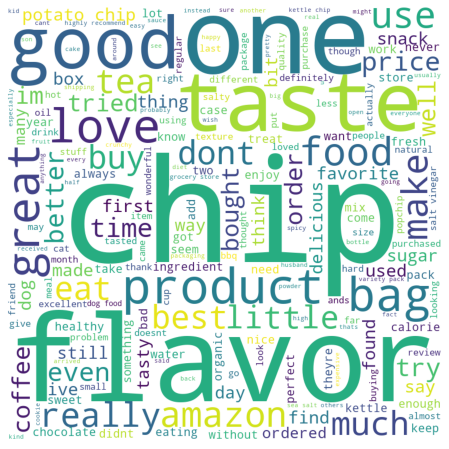

In [162]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 